# Fast Food Chain Data Analysis


**Dataset obtained from Kaggle: https://www.kaggle.com/datasets/stetsondone/top50fastfood**

> Data sourced from QSR Magazine, a business-to-business magazine in the quick service restaurant industry. This dataset includes the top 50 fast food chains in the U.S. in 2020. Contains information on the total sales, sales per unit, franchise units, company owned units, and unit change from 2018.

___

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# Load the dataset
data = pd.read_csv('fast_food_data.csv')
data.head()

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,mcdonalds,burger,40413,2912,13154,692,13846,-66
1,starbucks,snack,21550,1454,6768,8273,15041,216
2,chick_fil_a,chicken,11000,4517,2500,0,2500,130
3,taco_bell,global,11000,1502,6622,467,7089,181
4,burger_king,burger,10300,1399,7294,52,7346,16


In [3]:
print(data.shape)
print(data.info())

(50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        50 non-null     object
 1   category                       50 non-null     object
 2   sales_in_millions_2019         50 non-null     int64 
 3   sales_per_unit_thousands_2019  50 non-null     int64 
 4   franchised_units_2019          50 non-null     int64 
 5   company_owned_units_2019       50 non-null     int64 
 6   total_units_2019               50 non-null     int64 
 7   unit_change_from_2018          50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB
None


This dataset has **no null values**.

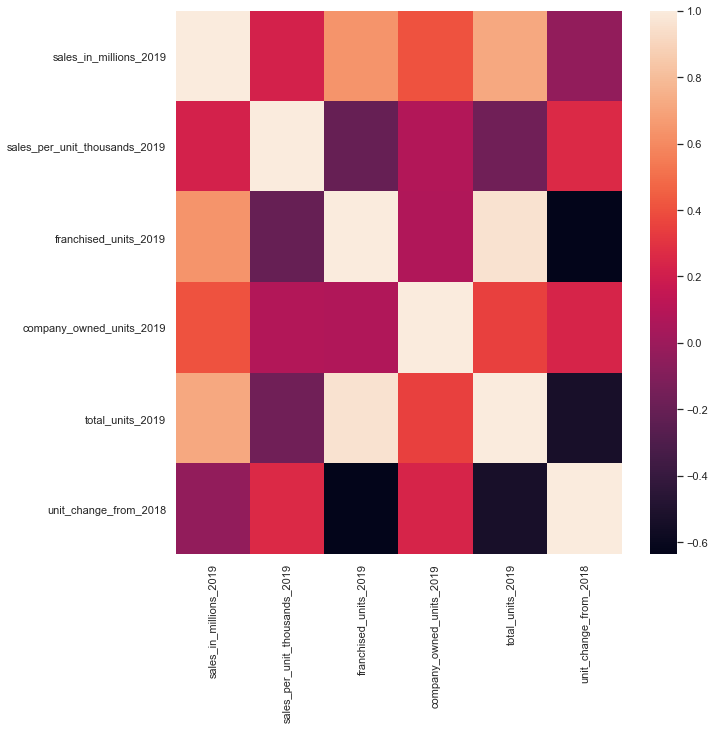

In [5]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())
plt.show()

All variables have a **perfect correlation** to one another.

____

## Further Exploration with Tableau

The below Vizualizations were created with Tableau. 

All of the below Vizualizations can be referenced at:
> https://public.tableau.com/app/profile/joann.balraj

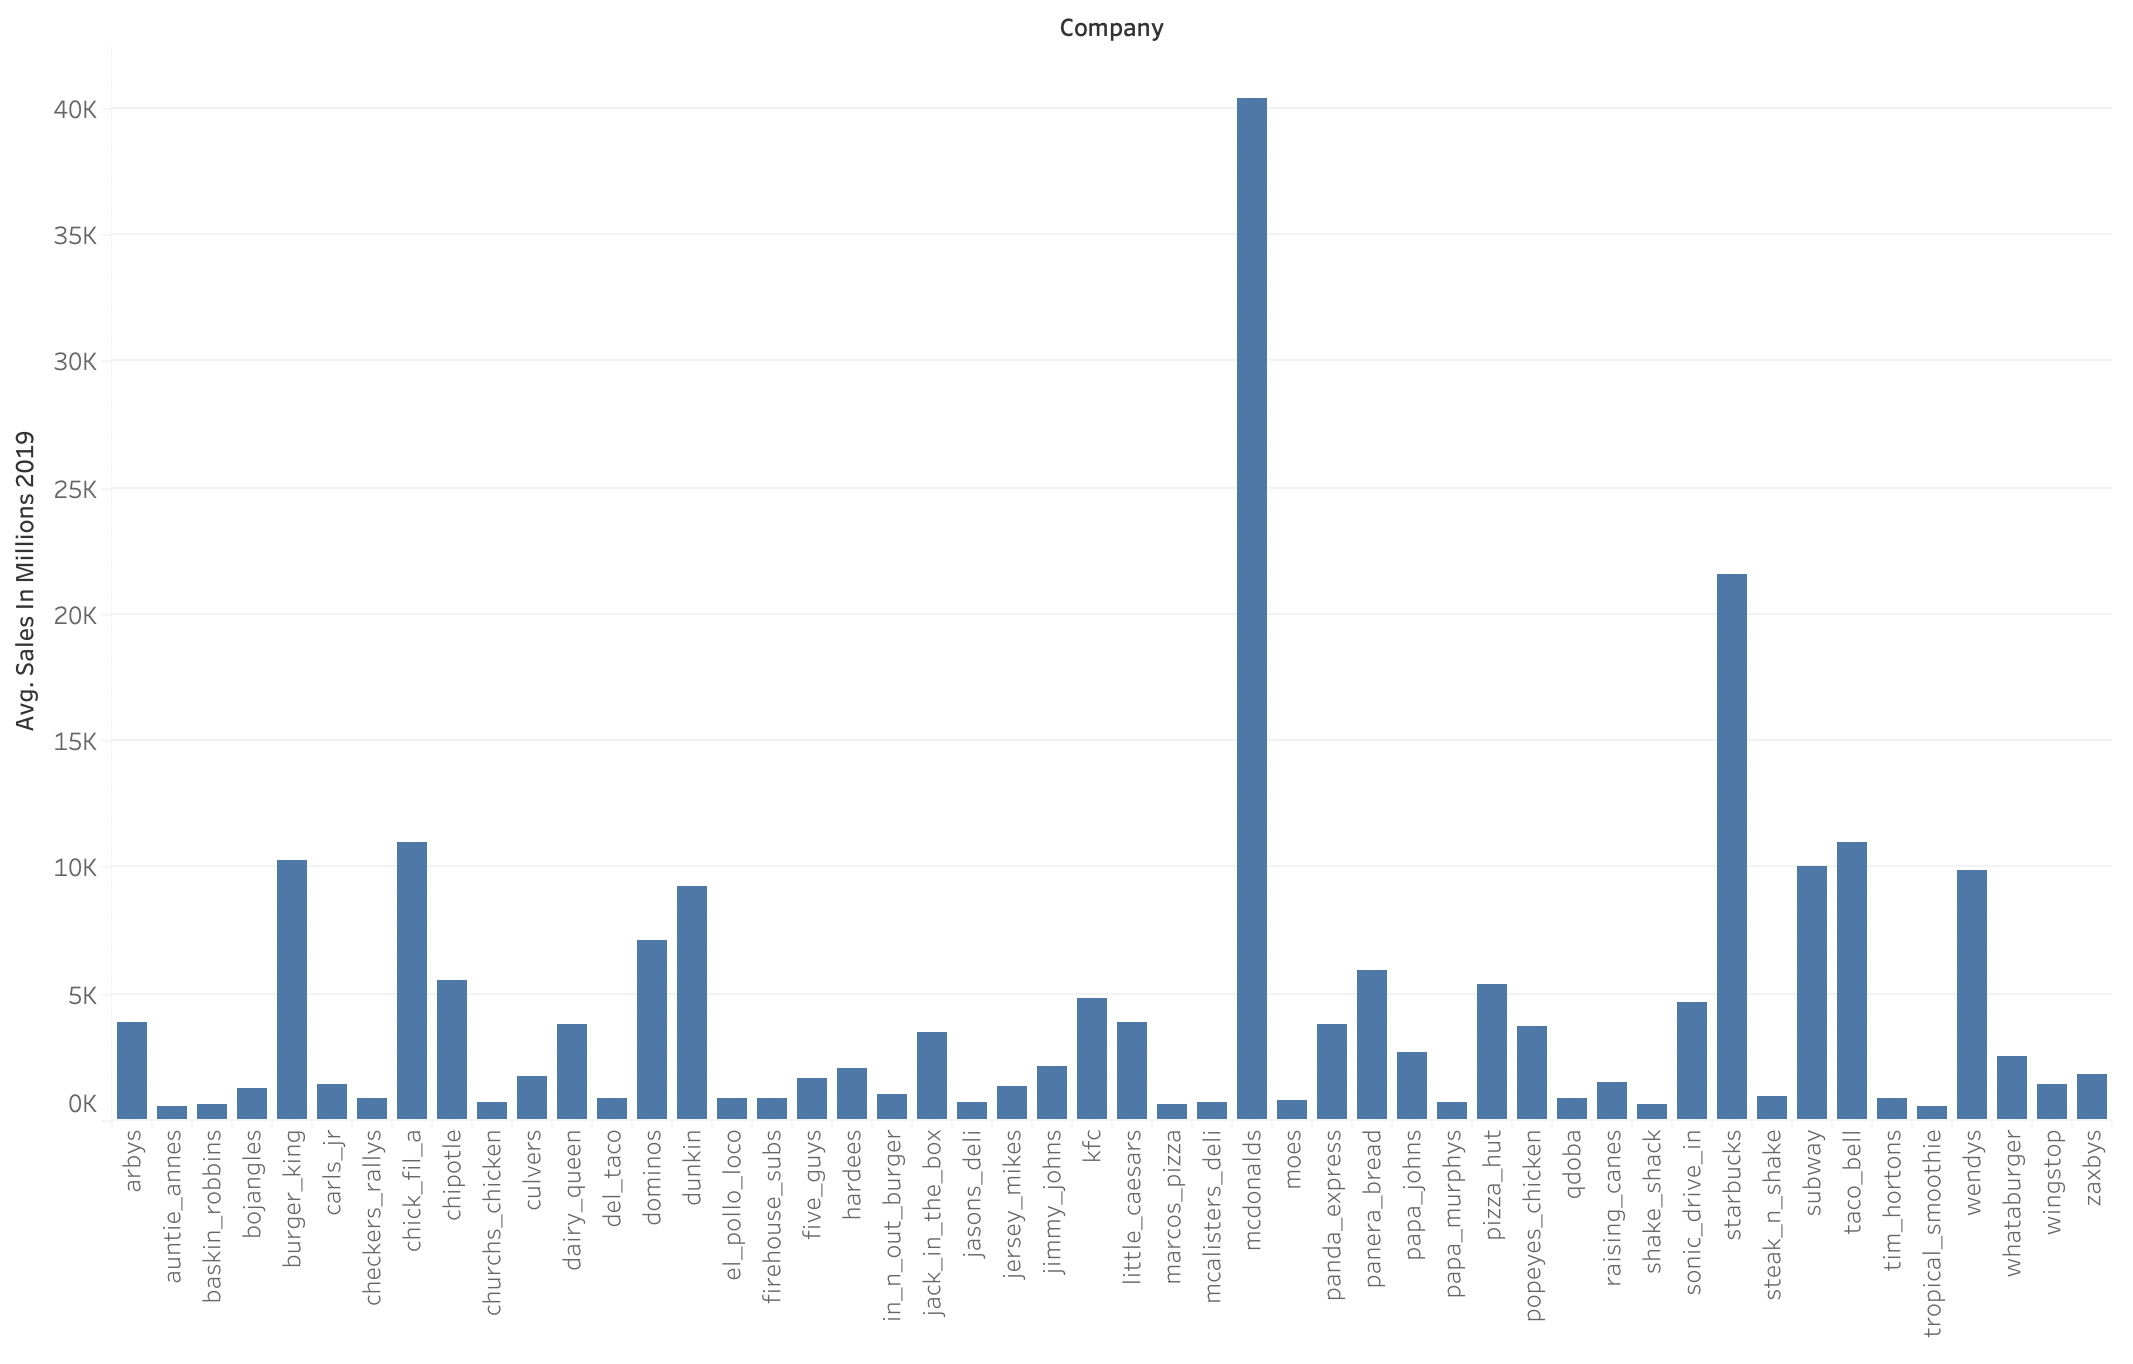

### Takeaways: "AVG Sales in Millions by Company (2019)" (Above)

- Mcdonald's has the highest amount of sales in millions by far with an average of over 40k of sales in millions.
- Starbucks follows with an average of over 20k of sales in millions.